In [24]:
# Import the libraries
import csv
import numpy as np
from matplotlib import pyplot as plt
from enum import Enum


class Category(Enum):
    Category1 = "Art_galleries"
    Category2 = "Dance_clubs"
    Category3 = "Juice_bars"
    Category4 = "Restaurants"
    Category5 = "Museums"
    Category6 = "Resorts"
    Category7 = "Picnic_spots"
    Category8 = "Beaches"
    Category9 = "Theaters"
    Category10 = "Religious_institutions"


class Rating(Enum):
    Terrible = 0
    Poor = 1
    Average = 2
    VeryGood = 3
    Excellent = 4

In [25]:
def readCSV(fileName: str):
    UserId = []
    Art_galleries = []
    Dance_clubs = []
    Juice_bars = []
    Restaurants = []
    Museums = []
    Resorts = []
    Picnic_spots = []
    Beaches = []
    Theaters = []
    Religious_institutions = []

    try:
        with open(fileName) as file:
            reader = csv.DictReader(file)
            for row in reader:
                try:
                    UserId.append(int(row['UserID']))
                    Art_galleries.append(float(row[Category.Category1.value]))
                    Dance_clubs.append(float(row[Category.Category2.value]))
                    Juice_bars.append(float(row[Category.Category3.value]))
                    Restaurants.append(float(row[Category.Category4.value]))
                    Museums.append(float(row[Category.Category5.value]))
                    Resorts.append(float(row[Category.Category6.value]))
                    Picnic_spots.append(float(row[Category.Category7.value]))
                    Beaches.append(float(row[Category.Category8.value]))
                    Theaters.append(float(row[Category.Category9.value]))
                    Religious_institutions.append(float(row[Category.Category10.value]))
                except:
                    print()
    except:
        print("Open file error")

    return np.array([UserId, Art_galleries, Dance_clubs, Juice_bars, Restaurants, Museums, Resorts, Picnic_spots, Beaches, Theaters, Religious_institutions])

In [26]:
def evaluation(score: int) -> str:
    resultStr = ""
    if score == Rating.Terrible.value:
        resultStr = "Terrible"
    elif score == Rating.Poor.value:
        resultStr = "Poor"
    elif score == Rating.Average.value:
        resultStr = "Average"
    elif score == Rating.VeryGood.value:
        resultStr = "VeryGood"
    elif score == Rating.Excellent.value:
        resultStr = "Excellent"
    else:
        resultStr = "No rating scores"
    return resultStr

In [27]:
def summarizeData(category: Category, dataset: np.ndarray):
    minNum = np.min(dataset)
    maxNum = np.max(dataset)
    avrNum = np.round(np.mean(dataset), 2)
    print(
        """{} summarize:
            The lowest rating:  {} [{}]
            The highest rating: {} [{}]
            The average rating: {} [{}]"""
            .format(
                category.value,
                minNum, evaluation(int(minNum)),
                maxNum, evaluation(int(maxNum)),
                avrNum, evaluation(int(avrNum))
            )
        )

In [28]:
# Code start here
# Read data from .csv file
fileName = "tripadvisor_review.csv"
data = readCSV(fileName)

feature_names = np.array([Category.Category1.value, Category.Category2.value, Category.Category3.value, 
                            Category.Category3.value, Category.Category5.value, Category.Category6.value,
                            Category.Category7.value, Category.Category8.value, Category.Category9.value,
                            Category.Category10.value])
trainingData_indexes = np.random.choice(data.shape[1], size = round(data.shape[1] * 0.75), replace = False)
trainingData = data[:, trainingData_indexes]
labels = np.array([Rating.Terrible.name, Rating.Poor.name, Rating.Average.name, Rating.VeryGood.name, Rating.Excellent.name])
testingData_indexes = np.delete(np.arange(data.shape[1]), trainingData_indexes)
testingData = data[:, testingData_indexes]
print(trainingData.shape, "\n\n", testingData.shape)
print(Rating.Poor.name)
# Summarize

(11, 735) 

 (11, 245)
Poor


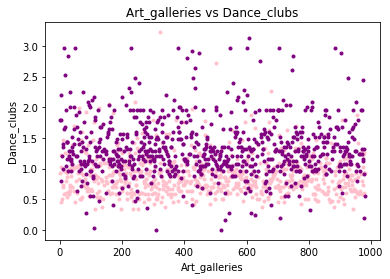

In [29]:
plt.figure(1)
plt.title("Art_galleries vs Dance_clubs")
plt.xlabel(Category.Category1.value)
plt.ylabel(Category.Category2.value)
plt.scatter(trainingData[0], trainingData[1], marker=".", c="pink")
plt.scatter(trainingData[0], trainingData[2], marker=".", c="purple")
plt.show()

In [44]:
a = trainingData[1:]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

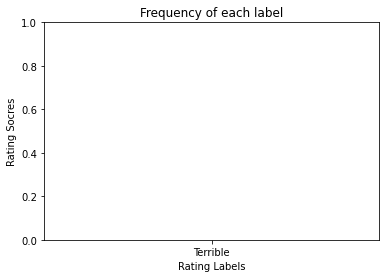

In [39]:
# Bar plot
plt.figure(4)
plt.title("Frequency of each label")
plt.xlabel("Rating Labels")
plt.ylabel("Rating Socres")
plt.bar(labels, trainingData[1:, 1:])
plt.grid(True)
plt.show()